Name: xxx

Student ID: 72405483

# Music Streaming Data Analysis
## dataset: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yamaerenay/spotify-dataset-19212020-600k-tracks")

print("Path to dataset files:", path)

Path to dataset files: /Users/sequel/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/versions/1


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import os
import ast
# 归一化 画到同一张图
from sklearn.preprocessing import MinMaxScaler

path = "/Users/sequel/.cache/kagglehub/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks/versions/1"
os.chdir(path)
# Load data
tracks_df = pd.read_csv('tracks.csv')
artists_df = pd.read_csv('artists.csv')
tracks_head_path = '/Users/sequel/Library/Mobile Documents/com~apple~CloudDocs/Documents/cityu-dg/sem2/cs5481-data/assign/ass2/track_head.csv'
artists_head_path = '/Users/sequel/Library/Mobile Documents/com~apple~CloudDocs/Documents/cityu-dg/sem2/cs5481-data/assign/ass2/artists_head.csv'
tracks_df.head().to_csv(tracks_head_path, index=False)
artists_df.head().to_csv(artists_head_path, index=False)
print(len(artists_df))

1162095


In [55]:
def clean_track_data(df):
    """
    Task: Clean the tracks dataset by:
    1. Handling missing values
    2. Removing duplicates
    3. Converting data types
    4. Creating derived features
    """
    # 1. Handling missing values
    df = df.dropna()  # 删除包含缺失值的行
    # 2. Removing duplicates
    df = df.drop_duplicates()  # 删除重复的行
    # 3. Converting data types
    df['release_date'] = pd.to_datetime(df['release_date'], format='mixed')
    # 4. Creating derived features
    # 例如，从 'duration_ms' 列创建 'duration_min' 列
    df['duration_min'] = df['duration_ms'] / 60000
    df['month'] = df['release_date'].dt.month
    df['decade'] = df['release_date'].dt.year // 10 * 10
    df['year'] = pd.to_datetime(df['release_date']).dt.year
    return df

# df = tracks_df
# # 找出所有包含缺失值的行
# missing_rows = df[df.isna().any(axis=1)]

# # 打印结果
# print("所有包含缺失值的行:")
# missing_rows
# print(len(tracks_df.columns))
cleaned_tracks = clean_track_data(tracks_df)
print("decrement is: ", len(tracks_df) - len(cleaned_tracks))

cleaned_tracks.head()
# 1922 -> 1922-01-01
# cleaned_tracks[cleaned_tracks['id'] == '0pXUGQcBxfoQXg2e7G9Wwk']

decrement is:  71


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,month,decade,year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.6,0.4,...,0.7,0.7,0.2,0.1,104.9,3,2.1,2,1920,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.7,0.3,...,0.8,0.0,0.1,0.7,102.0,1,1.6,6,1920,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.4,0.2,...,1.0,0.0,0.2,0.5,130.4,5,3.0,3,1920,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.3,0.1,...,1.0,0.9,0.1,0.4,170.0,3,2.9,3,1920,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922-01-01,0.4,0.2,...,1.0,0.1,0.3,0.2,103.2,4,2.7,1,1920,1922


In [56]:
def find_solo_artists(artist_name):
    """
    Task: Find artist names that don't contain collaborations
    - Should match: "Ed Sheeran", "Taylor Swift"
    - Should not match: "Ed Sheeran feat. Taylor Swift", "BTS & Coldplay"
    """
    # 定义正则表达式模式，匹配包含合作标识的字符串
    pattern = r'(feat\.| & | and |, )'
    # 使用 re.search 方法在字符串中查找匹配项
    match = re.search(pattern, str(artist_name))
    # 如果没有找到匹配项，说明是独唱艺人，返回 True；否则返回 False
    return not bool(match)

# Test the function
test_artists = [
    "Ed Sheeran",
    "BTS & Coldplay",
    "Taylor Swift feat. Ed Sheeran",
    "['Dick Haymes', 'Harry James', 'His Orchestra']"
]
for artist in test_artists:
    print(f"{artist}: {find_solo_artists(artist)}")
print("cleaning rows: ", len(cleaned_tracks))
solo_artists_df = cleaned_tracks[cleaned_tracks['artists'].apply(find_solo_artists)]
print("artist names that don't contain collaborations:",len(solo_artists_df))

Ed Sheeran: True
BTS & Coldplay: False
Taylor Swift feat. Ed Sheeran: False
['Dick Haymes', 'Harry James', 'His Orchestra']: False
cleaning rows:  586601
artist names that don't contain collaborations: 464404


In [57]:
def extract_featured_artists(track_name):
    """
    Task: Extract featured artists from track names
    - Input: "Love Yourself (feat. Justin Bieber)"
    - Output: "Justin Bieber"
    """
    # 使用正则表达式匹配不同的客串表述
    pattern = r'(?:feat\.|ft\.|featuring)\s+([^)]+)'
    match = re.search(pattern, track_name)
    return match.group(1).strip() if match else None

test_tracks = [
    "Love Yourself (feat. Justin Bieber)",
    "Stay With Me ft. Sam Smith",
    "No Featured Artist",
    "Perfect (featuring Ed Sheeran)"
]

# 测试提取功能
for track in test_tracks:
    featured_artist = extract_featured_artists(track)
    print(f"Track: {track}, Featured Artist: {featured_artist}")

Track: Love Yourself (feat. Justin Bieber), Featured Artist: Justin Bieber
Track: Stay With Me ft. Sam Smith, Featured Artist: Sam Smith
Track: No Featured Artist, Featured Artist: None
Track: Perfect (featuring Ed Sheeran), Featured Artist: Ed Sheeran


In [58]:
df = cleaned_tracks
# 筛选出数值类型的列
numeric_columns = df.select_dtypes(include='number').columns
print(numeric_columns)

# 假设你想要统计的列
selected_columns = ['duration_min', 'popularity', 'energy', 'danceability']  # 替换为你实际需要的列名
# 从数值列中筛选出你想要的列
filtered_columns = [col for col in selected_columns if col in numeric_columns]

# 设置 pandas 显示选项，避免使用科学计数法
pd.set_option('display.float_format', lambda x: '%.1f' % x)

# 计算筛选后列的最小值、最大值和范围
min_values = df[filtered_columns].min()
max_values = df[filtered_columns].max()
ranges = max_values - min_values

# 输出结果
result = pd.DataFrame({
    '最小值': min_values,
    '最大值': max_values,
    '范围': ranges
})

print(result)

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'duration_min', 'month', 'decade', 'year'],
      dtype='object')
              最小值   最大值    范围
duration_min  0.1  93.7  93.6
popularity    0.0 100.0 100.0
energy        0.0   1.0   1.0
danceability  0.0   1.0   1.0


In [59]:
bins = [0, 20, 40, 60, 80, 100]
time_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
test = [0, 20, 39, 59, 79, 99, 100]
res = pd.cut(test, bins=bins, labels=time_labels, right=False)
print(res)

['Very Short', 'Short', 'Short', 'Medium', 'Long', 'Very Long', NaN]
Categories (5, object): ['Very Short' < 'Short' < 'Medium' < 'Long' < 'Very Long']


In [60]:
'''
duration_min  0.1  93.7  93.6
popularity    0.0 100.0 100.0
energy        0.0   1.0   1.0
danceability  0.0   1.0   1.0
'''
def create_features(df):
    """
    Task: Create new features:
    1. Duration categories
    2. Popularity bins
    3. Audio feature combinations
    4. Text-based features
    """
    #duration_category:'Very Short', 'Short', 'Medium', 'Long', 'Very Long'
    #popularity_level:'Very Low', 'Low', 'Medium','High', 'Very High'
    #energy_dance_ratio:energy / danceability
    
    # 1. Duration categories
    # 假设 duration_ms 是表示歌曲时长的列
    bins = [0, 20, 40, 60, 80, 100]
    time_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
    df['duration_category'] = pd.cut(df['duration_min'], bins=bins, labels=time_labels, right=False)

    # 2. Popularity bins
    # 假设 popularity 是表示歌曲流行度的列
    popularity_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    df['popularity_level'] = pd.cut(df['popularity'], bins=bins, labels=popularity_labels, right=False)

    # 3. Audio feature combinations
    df['energy_dance_ratio'] = df['energy'] / df['danceability']

    # 4. Text-based features
    # 这里可以根据具体需求实现文本特征提取，暂时留空
    # 例如，可以从歌曲名称或艺术家名称中提取关键词等
    return df

cleaned_tracks = create_features(cleaned_tracks)
cleaned_tracks['danceability'].min()

0.0

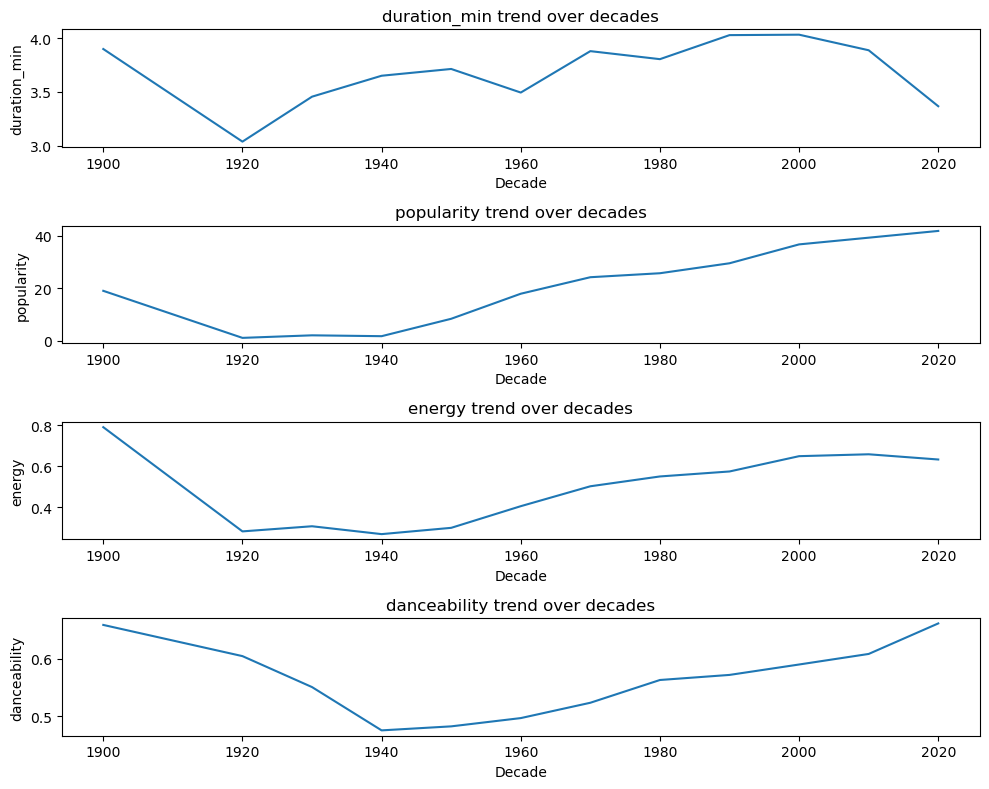

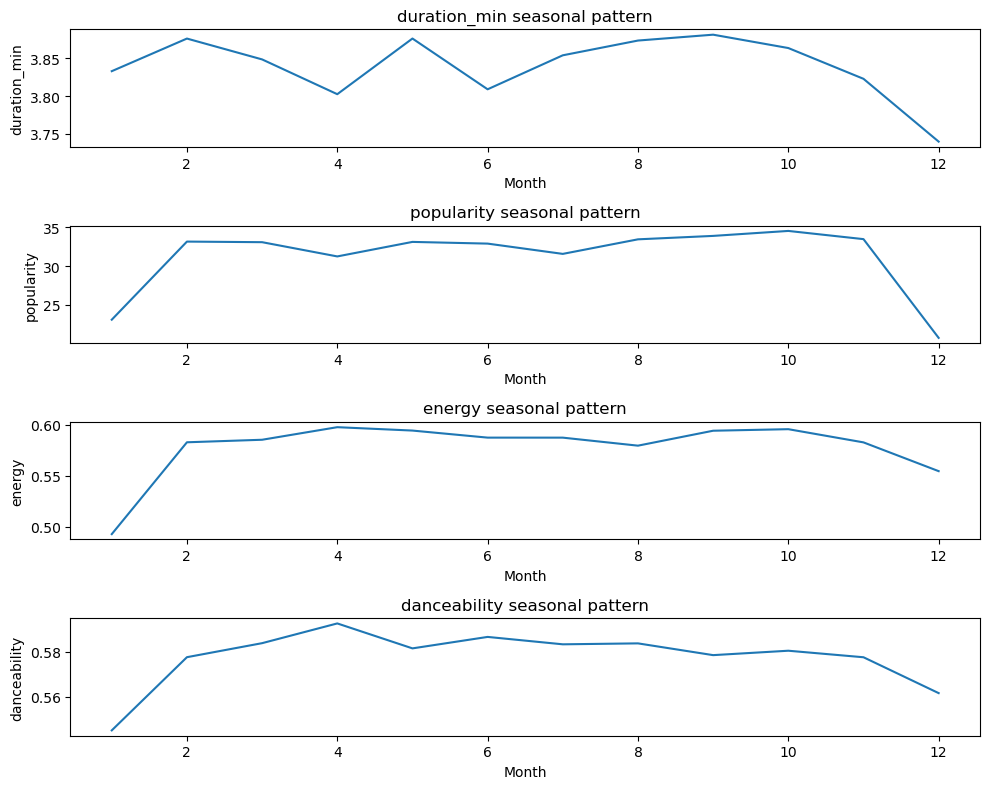

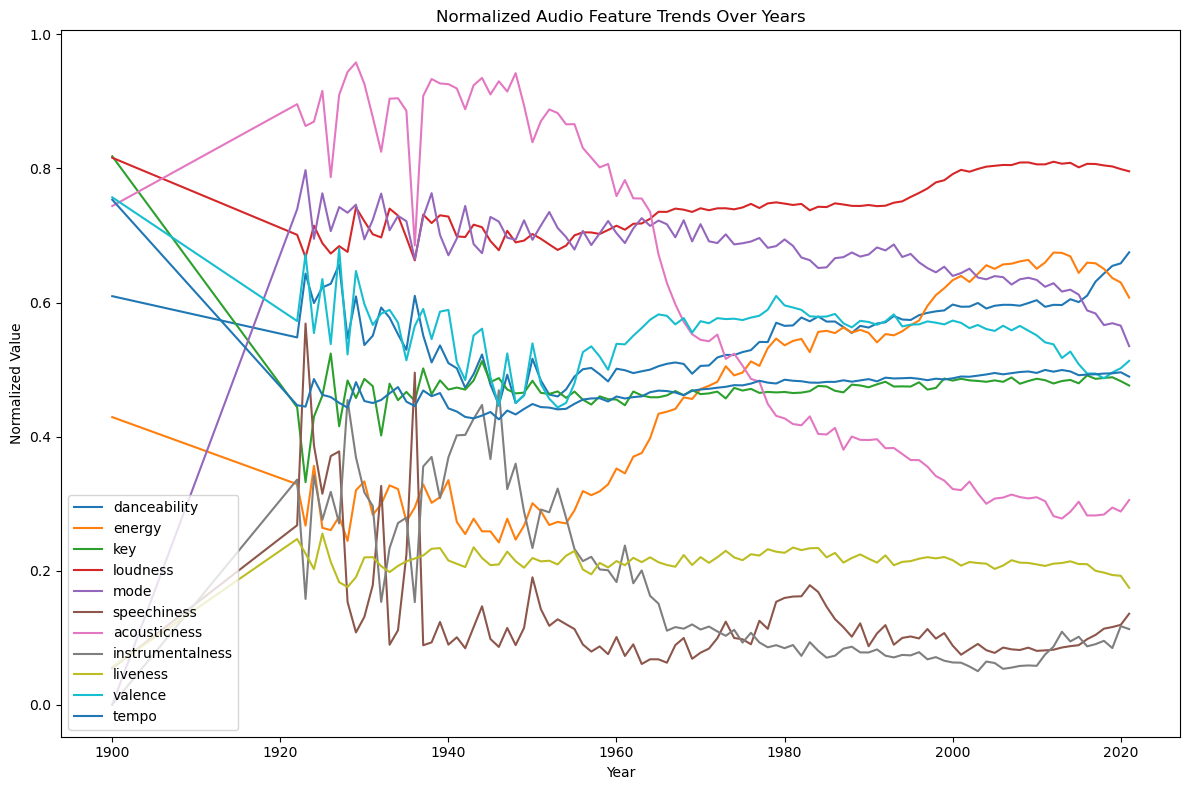

In [61]:
def plot_temporal_trends(df):
    """
    Task: Create time-based visualizations:
    1. Feature trends over decades
    2. Seasonal patterns
    3. Evolution of audio features
    """
    #1. Feature trends over decades
    features = ['duration_min', 'popularity', 'energy', 'danceability']
    fig, axes = plt.subplots(len(features), 1, figsize=(10, 8))
    for i, feature in enumerate(features):
        decade_trend = df.groupby('decade')[feature].mean()
        sns.lineplot(x=decade_trend.index, y=decade_trend.values, ax=axes[i])
        axes[i].set_title(f'{feature} trend over decades')
        axes[i].set_xlabel('Decade')
        axes[i].set_ylabel(feature)
    plt.tight_layout()

    # 2. Seasonal patterns
    seasonal_fig, seasonal_axes = plt.subplots(len(features), 1, figsize=(10, 8))
    for i, feature in enumerate(features):
        seasonal_pattern = df.groupby('month')[feature].mean()
        sns.lineplot(x=seasonal_pattern.index, y=seasonal_pattern.values, ax=seasonal_axes[i])
        seasonal_axes[i].set_title(f'{feature} seasonal pattern')
        seasonal_axes[i].set_xlabel('Month')
        seasonal_axes[i].set_ylabel(feature)
    plt.tight_layout()

    # 3. audio feature
    audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    # 特征归一化
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(df[audio_features])
    normalized_df = pd.DataFrame(normalized_data, columns=audio_features)
    normalized_df['year'] = df['year']

    # 按年份分组计算均值
    yearly_trends = normalized_df.groupby('year')[audio_features].mean()

    # 绘制变化趋势图
    plt.figure(figsize=(12, 8))
    for feature in audio_features:
        sns.lineplot(x=yearly_trends.index, y=yearly_trends[feature], label=feature)

    plt.title('Normalized Audio Feature Trends Over Years')
    plt.xlabel('Year')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
temporal_fig = plot_temporal_trends(cleaned_tracks)

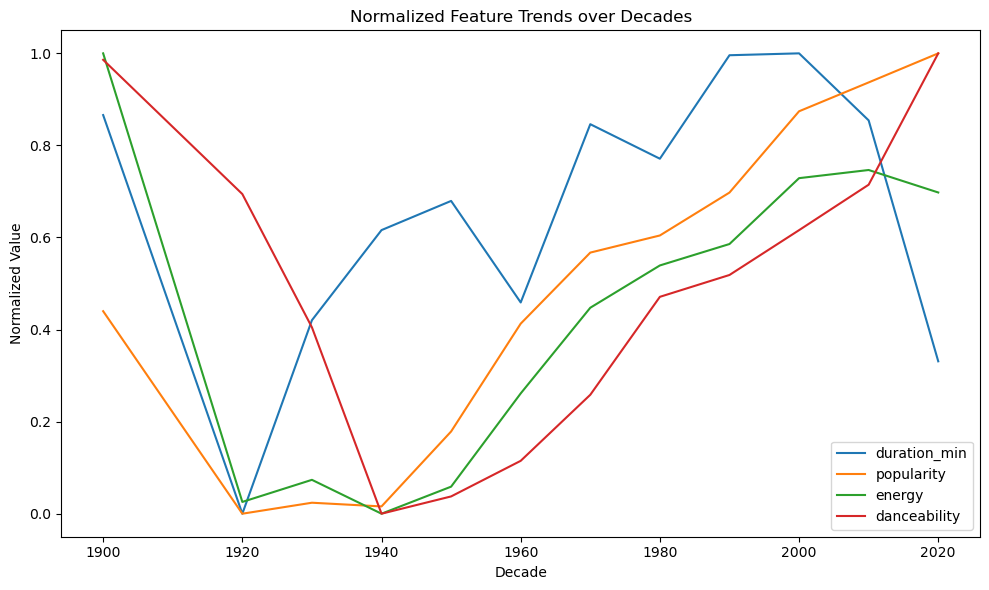

In [ ]:
# another way to do above by myself, put all data inot one picture
def plot_temporal_trends_normal(df):
    """
    Task: Create time-based visualizations:
    1. Feature trends over decades
    2. Seasonal patterns
    3. Evolution of audio features
    """
    #1. Feature trends over decades
    features = ['duration_min', 'popularity', 'energy', 'danceability']
    # 按年代分组并计算每个特征的平均值
    decade_trends = df.groupby('decade')[features].mean()
    
    # 对特征进行归一化处理
    scaler = MinMaxScaler()
    normalized_trends = scaler.fit_transform(decade_trends)
    normalized_trends = pd.DataFrame(normalized_trends, columns=features, index=decade_trends.index)

    # 创建一个新的图形
    plt.figure(figsize=(10, 6))
    
    # 绘制归一化后的特征趋势
    for feature in features:
        sns.lineplot(x=normalized_trends.index, y=normalized_trends[feature], label=feature)
    
    plt.title('Normalized Feature Trends over Decades')
    plt.xlabel('Decade')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.tight_layout()
    return plt.gcf()

# 假设 cleaned_tracks 是已经定义好的数据框
temporal_fig = plot_temporal_trends_normal(cleaned_tracks)
plt.show()

类型是：  category
popularity_level
Very Low     209822
Low          219149
Medium       129786
High          26890
Very High       953
Name: count, dtype: int64


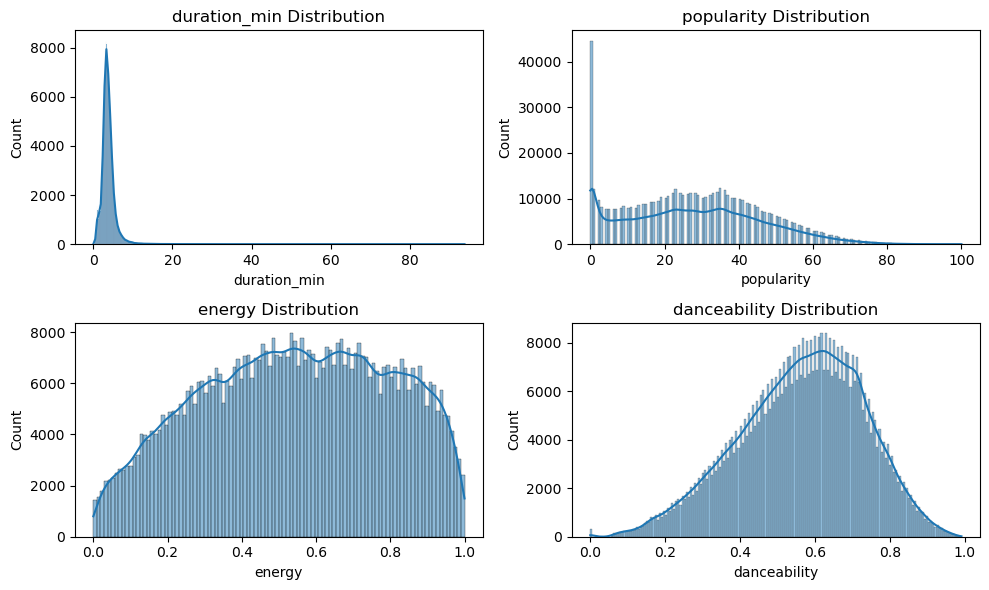

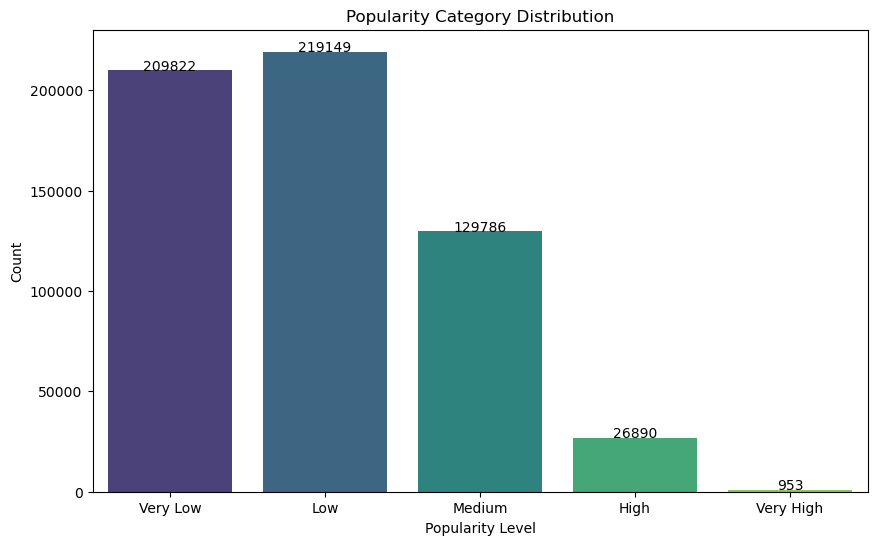

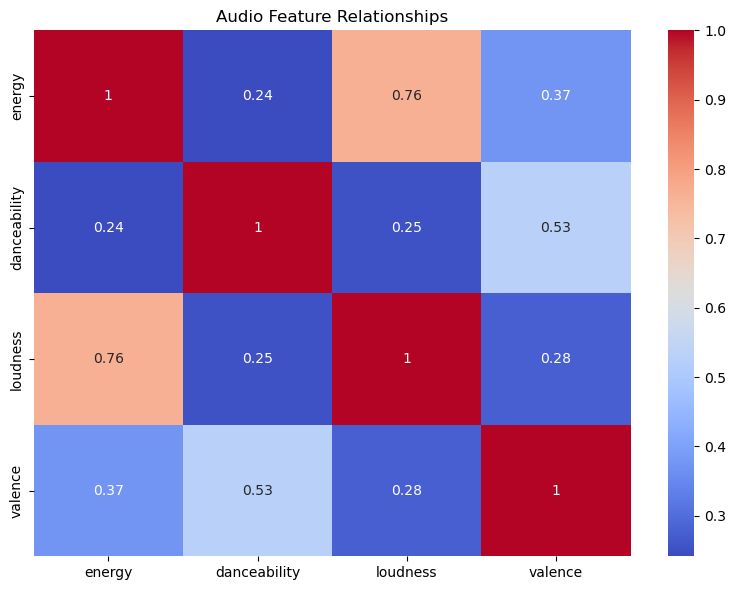

In [63]:
def plot_feature_distributions(df):
    """
    Task: Create distribution visualizations:
    1. Multiple feature distributions
    2. Popularity distribution by category
    3. Audio feature relationships
    """
    # 1. Multiple feature distributions
    features = ['duration_min', 'popularity', 'energy', 'danceability']
    fig, axes = plt.subplots(2, 2, figsize=(10, 6))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        sns.histplot(df[feature], kde=True, ax=axes[i])
        axes[i].set_title(f'{feature} Distribution')
    plt.tight_layout()

    # 2. Popularity distribution by category
    category_col = 'popularity_level'
    print("类型是： ", df[category_col].dtype)
    if category_col in df.columns:
        plt.figure(figsize=(10, 6))
        # 显示每个类别的数量分布
        value_counts = df[category_col].value_counts().sort_index()
        print(value_counts)
        ax = sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette="viridis", legend=False)
        # 添加数值标注
        for i, v in enumerate(value_counts):
            ax.text(i, v + 1, str(v), ha='center')
        plt.title('Popularity Category Distribution')
        plt.xlabel('Popularity Level')
        plt.ylabel('Count')

    # 3. Audio feature relationships
    audio_features = ['energy', 'danceability', 'loudness', 'valence']
    corr_matrix = df[audio_features].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Audio Feature Relationships')
    plt.tight_layout()
    return fig
plot_feature_distributions(cleaned_tracks)
plt.show()


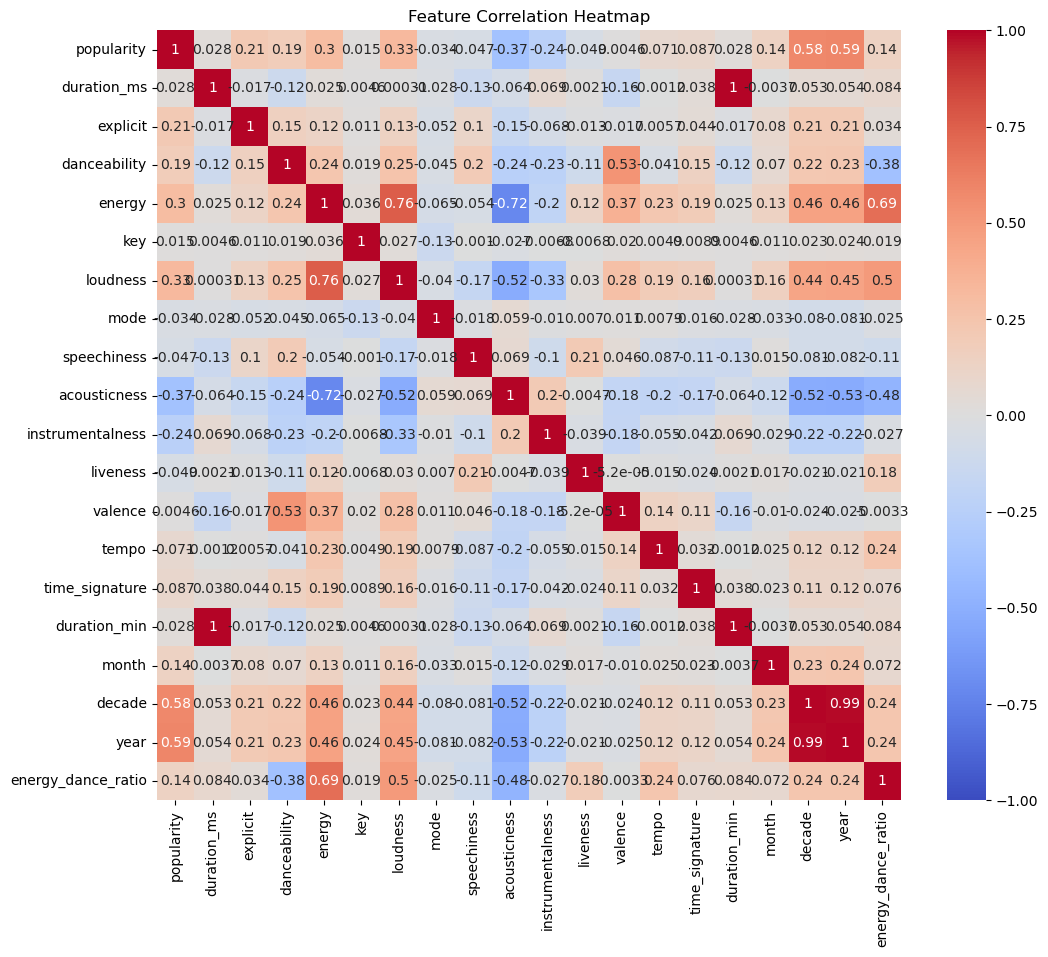

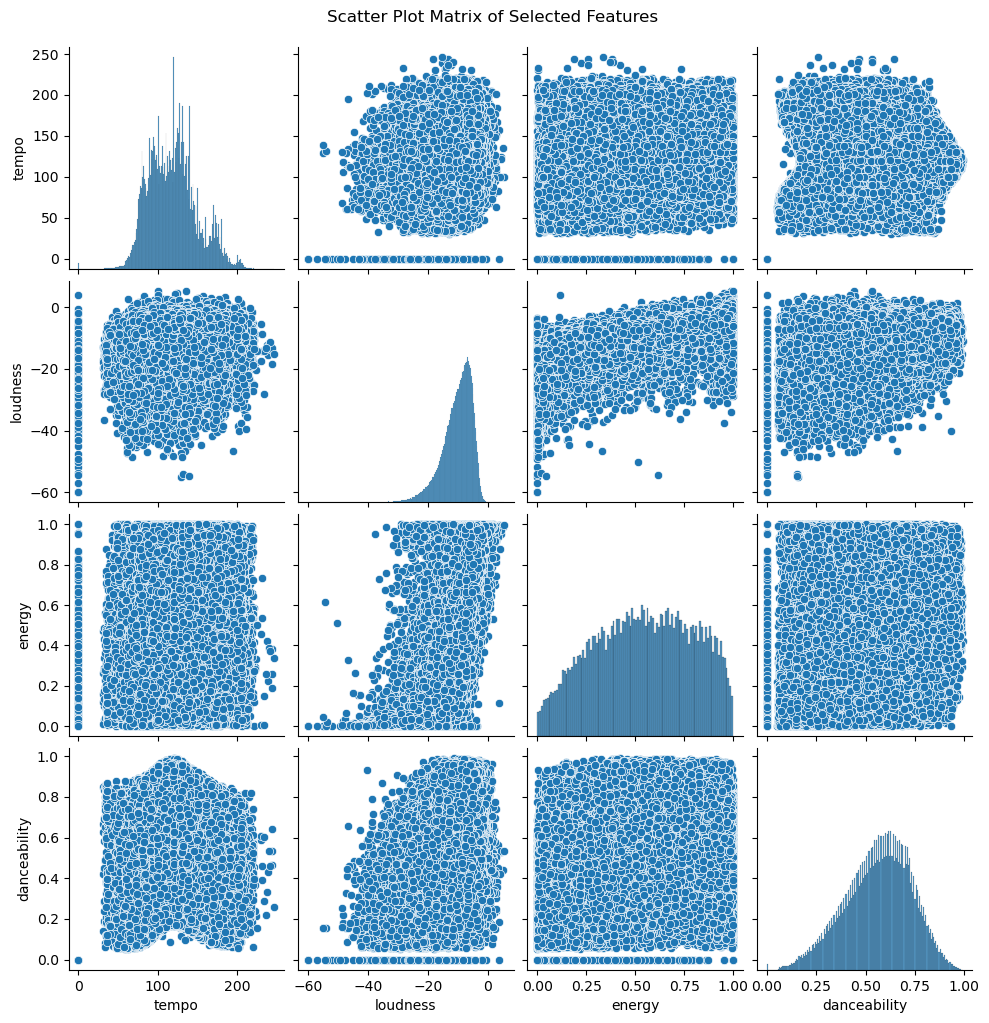

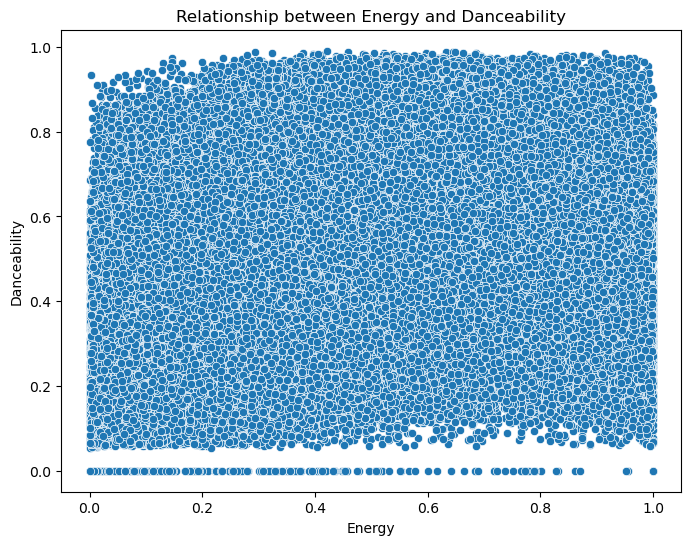

<Figure size 640x480 with 0 Axes>

In [64]:
def plot_correlation_analysis(df):
    """
    Task: Create correlation visualizations:
    1. Feature correlation heatmap
    2. Scatter plot matrix
    3. Specific feature relationships
    """
    # 筛选出数值列
    numerical_df = df.select_dtypes(include=['number'])
    
    # 1. Feature correlation heatmap
    corr_matrix = numerical_df.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Feature Correlation Heatmap')
    plt.show()

    # 2. Scatter plot matrix
    selected_features = ['tempo', 'loudness', 'energy', 'danceability']
    # 确保 selected_features 都在数值列中
    valid_features = [feature for feature in selected_features if feature in numerical_df.columns]
    if valid_features:
        sns.pairplot(numerical_df[valid_features])
        plt.suptitle('Scatter Plot Matrix of Selected Features', y=1.02)
        plt.show()

    # 3. Specific feature relationships
    if 'energy' in numerical_df.columns and 'danceability' in numerical_df.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x='energy', y='danceability', data=numerical_df)
        plt.title('Relationship between Energy and Danceability')
        plt.xlabel('Energy')
        plt.ylabel('Danceability')
        plt.show()
    return plt.gcf()
    
corr_fig = plot_correlation_analysis(cleaned_tracks)


### Data Processing:
- Filter artists by genre
- Calculate yearly popularity
- Normalize values between 0-1
### Polygon Creation:
- Points need to form a closed shape
- Include base points
- Use proper ordering
### Key Concepts:
- Genre stacking (base_y)
- Time progression (x-axis)
- Popularity representation (height)

['dance pop', 'pop', 'rock', 'electro house', 'classical performance']
genre_artists len: 572
numbers of tracks realted to current genre: 12119
genre_artists len: 568
numbers of tracks realted to current genre: 11908
genre_artists len: 564
numbers of tracks realted to current genre: 32026
genre_artists len: 559
numbers of tracks realted to current genre: 1994
genre_artists len: 502
numbers of tracks realted to current genre: 13808


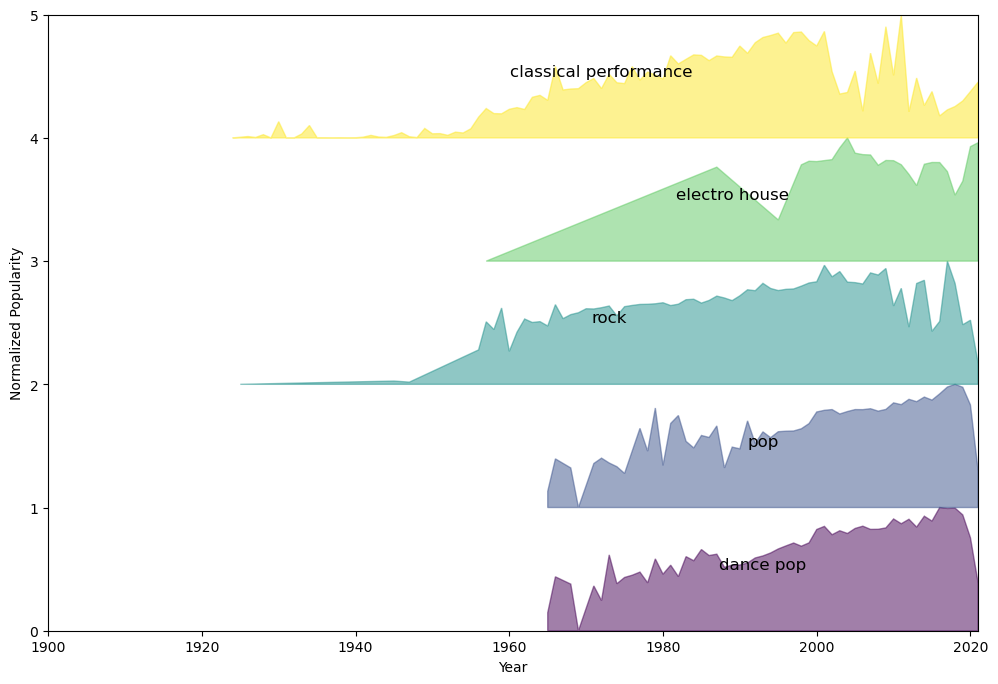

In [65]:
def is_genre_track(artist_ids, genre_artist_ids):
    # 检查曲目的艺术家列表中是否有艺术家属于当前流派
    return any(artist_id in genre_artist_ids for artist_id in artist_ids)

def visualize_genre_evolution(tracks_df, artists_df):
    # Convert genres and dates
    artists_df['genres_list'] = artists_df['genres'].apply(eval)
    artists_df = artists_df[artists_df['genres_list'].apply(lambda x: len(x) > 0)]
    tracks_df['year'] = pd.to_datetime(tracks_df['release_date'], format='mixed').dt.year
    # Create a dictionary to count genres
    genre_count = {}
    for genres in artists_df['genres_list']:
        for genre in genres:
            genre_count[genre] = genre_count.get(genre, 0) + 1
    
    # Get top 5 genres
    top_genres = sorted(genre_count, key=genre_count.get, reverse=True)[:5]
    
    print(top_genres)
    # Create plot
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_genres)))
    
    # Initialize scaler for normalization
    scaler = MinMaxScaler()  
    base_y = 0
    for idx, genre in enumerate(top_genres):
        #1. 过滤出特定gentres对应的artist
        genre_artists = artists_df[artists_df['genres_list'].apply(lambda x: genre in x)]
        print("genre_artists len:",len(genre_artists))
    #2. 根据1中特定的artist 过滤出tracks
        # 2.1 转换艺术家ID列表,id_artists是字符串类型的列表，需要转换为列表类型
        tracks_df['id_artists_list'] = tracks_df['id_artists'].apply(eval)
        # 2.2 根据当前流派曲目对应-艺术家列表-筛选出这些流派的曲目，
        # (gentre, atristids) x (atristid, track_id)-> (gentre, track_id)
        genre_tracks = tracks_df[
            tracks_df['id_artists_list'].apply(
                lambda x: is_genre_track(x, genre_artists['id'].values)
            )
        ]
        print("numbers of tracks realted to current genre:", len(genre_tracks))
    #3. 计算2中的tracks的popularity的平均值
        genre_by_year = genre_tracks.groupby('year')['popularity'].mean().to_dict()

        # Skip if no data
        if not genre_by_year:
            print("This gentre relate to empty tracks, somthing went wrong!")
            continue
    #4. 对3中的popularity进行归一化处理
    #5. 绘制多边形
    #6. 绘制标签
        # Normalize values between 0-1
        years = list(genre_by_year.keys())
        popularity = np.array(list(genre_by_year.values())).reshape(-1, 1)
        normalized_popularity = scaler.fit_transform(popularity).flatten()
        
        # Create polygon points
        points = list(zip(years, normalized_popularity + base_y))
        points = [(years[0], base_y)] + points + [(years[-1], base_y)]
        
        # Add polygon to plot
        polygon = plt.Polygon(points, color=colors[idx], alpha=0.5)
        ax.add_patch(polygon)
        
        # Add label
        mid_year = (years[0] + years[-1]) // 2
        ax.text(mid_year, base_y + 0.5, genre, fontsize=12, ha='center')
        
        base_y += 1
        
    # Set plot properties
    ax.set_xlim(min(tracks_df['year']), max(tracks_df['year']))
    ax.set_ylim(0, len(top_genres))
    plt.xlabel('Year')
    plt.ylabel('Normalized Popularity')
    return fig

# Create visualization
genre_fig = visualize_genre_evolution(tracks_df, artists_df)
plt.show()